In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn

device = torch.device("mps")

In [2]:
df = pd.read_csv('../datasets/crx.csv')
df.head()

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df['a2'].value_counts()

a2
?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: count, Length: 350, dtype: int64

<Axes: xlabel='a2'>

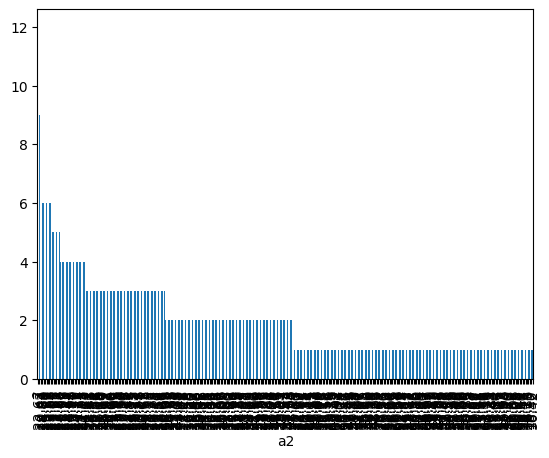

In [4]:
vals = df['a2'].value_counts()
vals.plot(kind='bar')

In [5]:
df['a14'].value_counts()

a14
00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: count, Length: 171, dtype: int64

### Plan to complete
- x should have 's3','a8','a9','a10','a11','a12','a13','a15'.
- Get all rows which are missing seperately for 'a2' and 'a14' --> mark it as test set for prediction
- Rest all rows will be used as training dataset for 'a2' and 'a14'

In [6]:
x_cols = ['s3','a8','a9','a10','a11','a12','a13','a15']
x = df[x_cols]
df['a2'] = df['a2'].replace('?', np.nan)
test_a2 = df[df['a2'].isna()][x_cols]

df['a14'] = df['a14'].replace('?', np.nan)
test_a14 = df[df['a14'].isna()][x_cols]

x_a2 = df.dropna(subset=['a2']).reset_index(drop='index')
x_a14 = df.dropna(subset=['a14']).reset_index(drop='index')

In [7]:
x_a14.shape, test_a14.shape

((677, 16), (13, 8))

In [8]:
x_a2.shape, test_a2.shape

((678, 16), (12, 8))

In [9]:
x_a14_ = x_a14[x_cols]
y_a14 = x_a14['a14'].astype('float32')
x_a2_ = x_a2[x_cols]
y_a2 = x_a2['a2'].astype('float32')

In [10]:
x_a14_.shape, y_a14.shape, x_a2_.shape, y_a2.shape

((677, 8), (677,), (678, 8), (678,))

In [11]:
x_a14_.head()

,s3,a8,a9,a10,a11,a12,a13,a15
0,0.000,1.25,t,t,1,f,g,0
1,4.460,3.04,t,t,6,f,g,560
2,0.500,1.50,t,f,0,f,g,824
3,1.540,3.75,t,t,5,t,g,3
4,5.625,1.71,t,f,0,f,s,0


In [12]:
y_a14

0      202.0
1       43.0
2      280.0
3      100.0
4      120.0
       ...  
672    260.0
673    200.0
674    200.0
675    280.0
676      0.0
Name: a14, Length: 677, dtype: float32

In [13]:
cat_cols_a14 = x_a14_.select_dtypes("object")
cat_cols_a2 = x_a2_.select_dtypes("object")

le = LabelEncoder()

dum_df_a14 = cat_cols_a14.apply(le.fit_transform)
dum_df_a2 = cat_cols_a2.apply(le.fit_transform)

# joining df and dum_df
x_a14_ = x_a14_.drop(cat_cols_a14, axis=1)
final_x_a14 = x_a14_.join(dum_df_a14)
# joining df and dum_df
x_a2_ = x_a2_.drop(cat_cols_a2, axis=1)
final_x_a2 = x_a2_.join(dum_df_a2)

In [14]:
final_x_a14.shape, y_a14.shape, final_x_a2.shape, y_a2.shape

((677, 8), (677,), (678, 8), (678,))

In [15]:
test_a14.shape, test_a2.shape

((13, 8), (12, 8))

In [19]:
# regression for predicting a14
x = torch.tensor(final_x_a14.values, dtype=torch.float32, device=device)
y = torch.tensor(y_a14.values, dtype=torch.float32, device=device).view(-1,1)

